#Understanding Data

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('plasma', n_colors=None, desat=None, color_codes=False)
pc = ['#FFB6C1', '#FFA07A', '#FFD700', '#98FB98', '#DDA0DD', '#87CEEB', '#F0E68C', '#FFE4E1', '#98FB98', '#FF69B4']

In [2]:
df = pd.read_csv('diamonds.csv')
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


>Format is Number of rows * Number of columns

In [3]:
df.size

5492575

>(Numbers of rows,Number of columns)

In [4]:
df.shape

(219703, 25)

>It is describing data type And showing count of NULL or Non

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          219703 non-null  object 
 1   color                        219703 non-null  object 
 2   clarity                      219703 non-null  object 
 3   carat_weight                 219703 non-null  float64
 4   cut_quality                  219703 non-null  object 
 5   lab                          219703 non-null  object 
 6   symmetry                     219703 non-null  object 
 7   polish                       219703 non-null  object 
 8   eye_clean                    219703 non-null  object 
 9   culet_size                   219703 non-null  object 
 10  culet_condition              219703 non-null  object 
 11  depth_percent                219703 non-null  float64
 12  table_percent                219703 non-null  float64
 13 

Showing count of Null values

In [6]:
df['fancy_color_intensity'].unique()

array(['unknown', 'Fancy', 'Very Light', 'Faint', 'Fancy Light', 'Light',
       'Fancy Deep', 'Fancy Intense', 'Fancy Dark', 'Fancy Vivid'],
      dtype=object)

In [7]:
df.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

#Statistical Analysis

It will show summary of data which is numeric type

In [8]:
df.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


It will show summary of data which is object(string) type

In [9]:
df.describe(include='O').T

,count,unique,top,freq
cut,219703,11,Round,158316
color,219703,11,E,33103
clarity,219703,11,SI1,38627
cut_quality,219703,6,Excellent,124861
lab,219703,3,GIA,200434
symmetry,219703,5,Excellent,131619
polish,219703,5,Excellent,175806
eye_clean,219703,5,unknown,156916
culet_size,219703,9,N,131899
culet_condition,219703,4,unknown,204384


Looking for outliers.....

In [10]:
top_price_by_carat_weight=df[['carat_weight','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_price_by_carat_weight

,carat_weight,total_sales_price
219702,10.03,1449881
219701,0.90,1350000
219700,18.07,1315496
219699,5.17,1292500
219698,10.65,1210692
219697,10.04,1161102
219696,18.88,1132347
219695,10.00,1124122
219694,12.52,1121792
219693,12.52,1121792


In this dataset it is not in favour to remove instances for better learning.

In [11]:
top_price_by_meas_length=df[['meas_length','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_price_by_meas_length

,meas_length,total_sales_price
219702,15.61,1449881
219701,5.22,1350000
219700,17.06,1315496
219699,11.55,1292500
219698,14.06,1210692
219697,14.13,1161102
219696,21.34,1132347
219695,11.78,1124122
219694,14.84,1121792
219693,14.84,1121792


In [12]:
top_price_by_meas_width=df[['meas_width','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_price_by_meas_width

,meas_width,total_sales_price
219702,11.09,1449881
219701,4.90,1350000
219700,17.10,1315496
219699,8.81,1292500
219698,14.18,1210692
219697,10.86,1161102
219696,15.23,1132347
219695,10.84,1124122
219694,14.91,1121792
219693,14.91,1121792


In [13]:
top_price_by_meas_depth=df[['meas_depth','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_price_by_meas_depth

,meas_depth,total_sales_price
219702,7.39,1449881
219701,3.47,1350000
219700,10.20,1315496
219699,5.71,1292500
219698,8.66,1210692
219697,7.90,1161102
219696,8.69,1132347
219695,8.47,1124122
219694,9.24,1121792
219693,9.24,1121792


In [14]:
top_price_by_clarty=df[['clarity','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_price_by_clarty

,clarity,total_sales_price
219702,VVS2,1449881
219701,SI2,1350000
219700,VS1,1315496
219699,VS2,1292500
219698,VS1,1210692
219697,VS1,1161102
219696,VS2,1132347
219695,VVS1,1124122
219694,IF,1121792
219693,IF,1121792


In [15]:
top_price_by_cut=df[['cut','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_price_by_cut

,cut,total_sales_price
219702,Pear,1449881
219701,Princess,1350000
219700,Round,1315496
219699,Radiant,1292500
219698,Round,1210692
219697,Oval,1161102
219696,Oval,1132347
219695,Cushion Modified,1124122
219694,Round,1121792
219693,Round,1121792


In [16]:
top_price_by_color=df[['color','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_price_by_cut

,cut,total_sales_price
219702,Pear,1449881
219701,Princess,1350000
219700,Round,1315496
219699,Radiant,1292500
219698,Round,1210692
219697,Oval,1161102
219696,Oval,1132347
219695,Cushion Modified,1124122
219694,Round,1121792
219693,Round,1121792


In [17]:
top_price_by_depth_percent=df[['depth_percent','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_price_by_cut

,cut,total_sales_price
219702,Pear,1449881
219701,Princess,1350000
219700,Round,1315496
219699,Radiant,1292500
219698,Round,1210692
219697,Oval,1161102
219696,Oval,1132347
219695,Cushion Modified,1124122
219694,Round,1121792
219693,Round,1121792


Plotting Bar-Plot for showing relation between total_sales_price and carat_weight,meas_length,meas_width,meas_depth

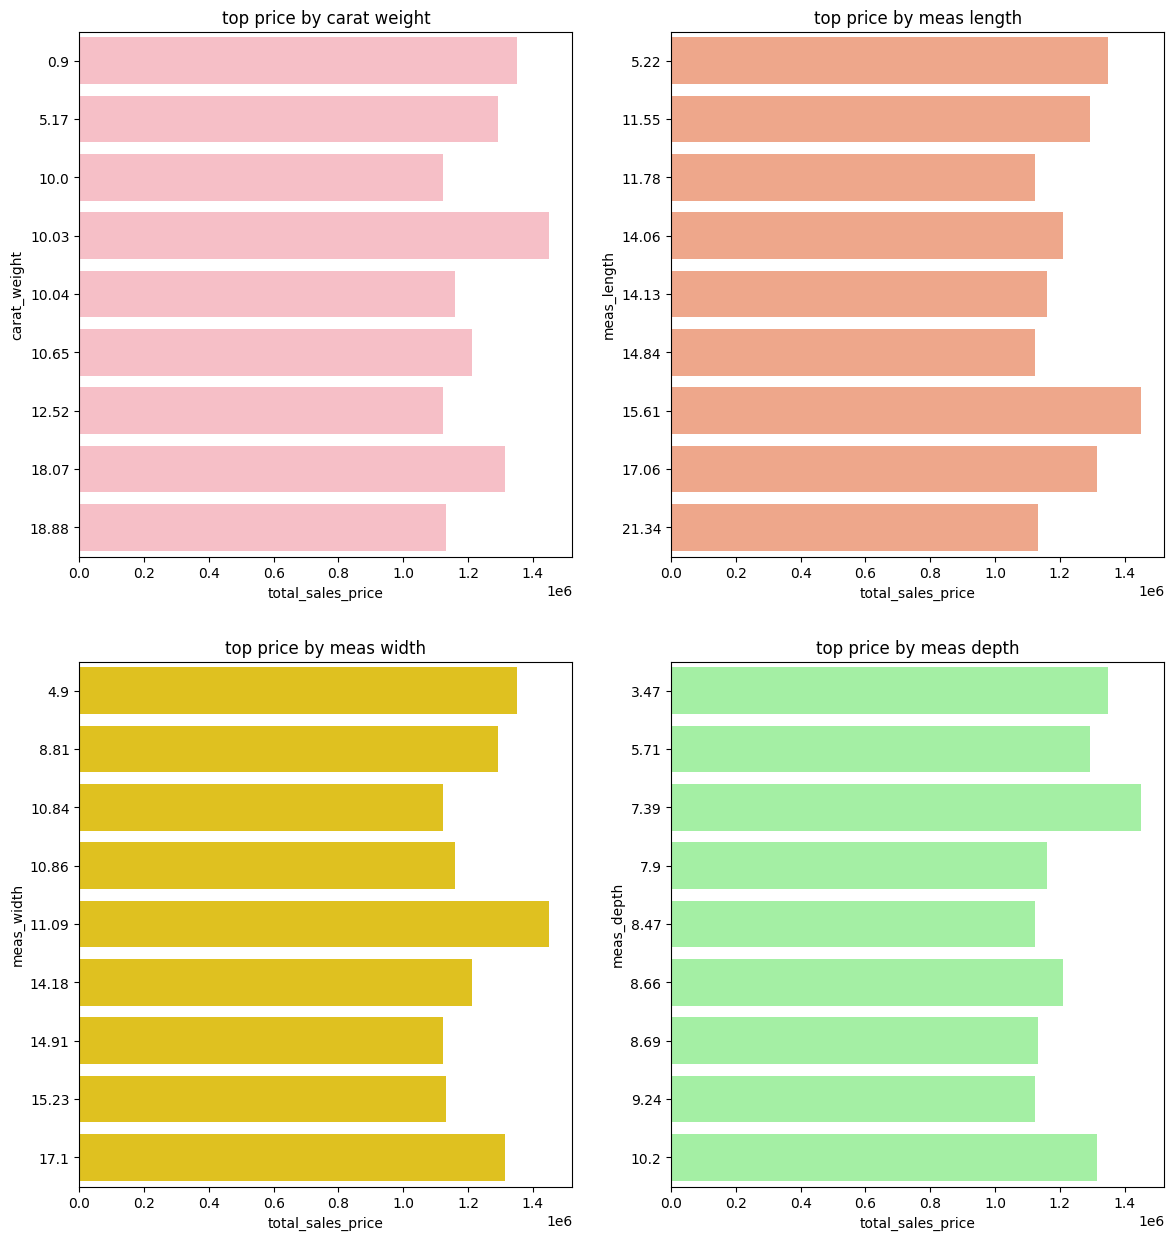

In [18]:
plt.figure(figsize=(14, 15))
plt.subplot(2, 2, 1)
sns.barplot(top_price_by_carat_weight,x='total_sales_price',y='carat_weight',color=pc[0],orient='h')
plt.title('top price by carat weight')
plt.subplot(2,2,2)
sns.barplot(top_price_by_meas_length,x='total_sales_price',y='meas_length',color=pc[1],orient='h')
plt.title('top price by meas length')
plt.subplot(2,2,3)
sns.barplot(top_price_by_meas_width,x='total_sales_price',y='meas_width',color=pc[2],orient='h')
plt.title('top price by meas width')
plt.subplot(2,2,4)
sns.barplot(top_price_by_meas_depth,x='total_sales_price',y='meas_depth',color=pc[3],orient='h')
plt.title('top price by meas depth')
plt.show()

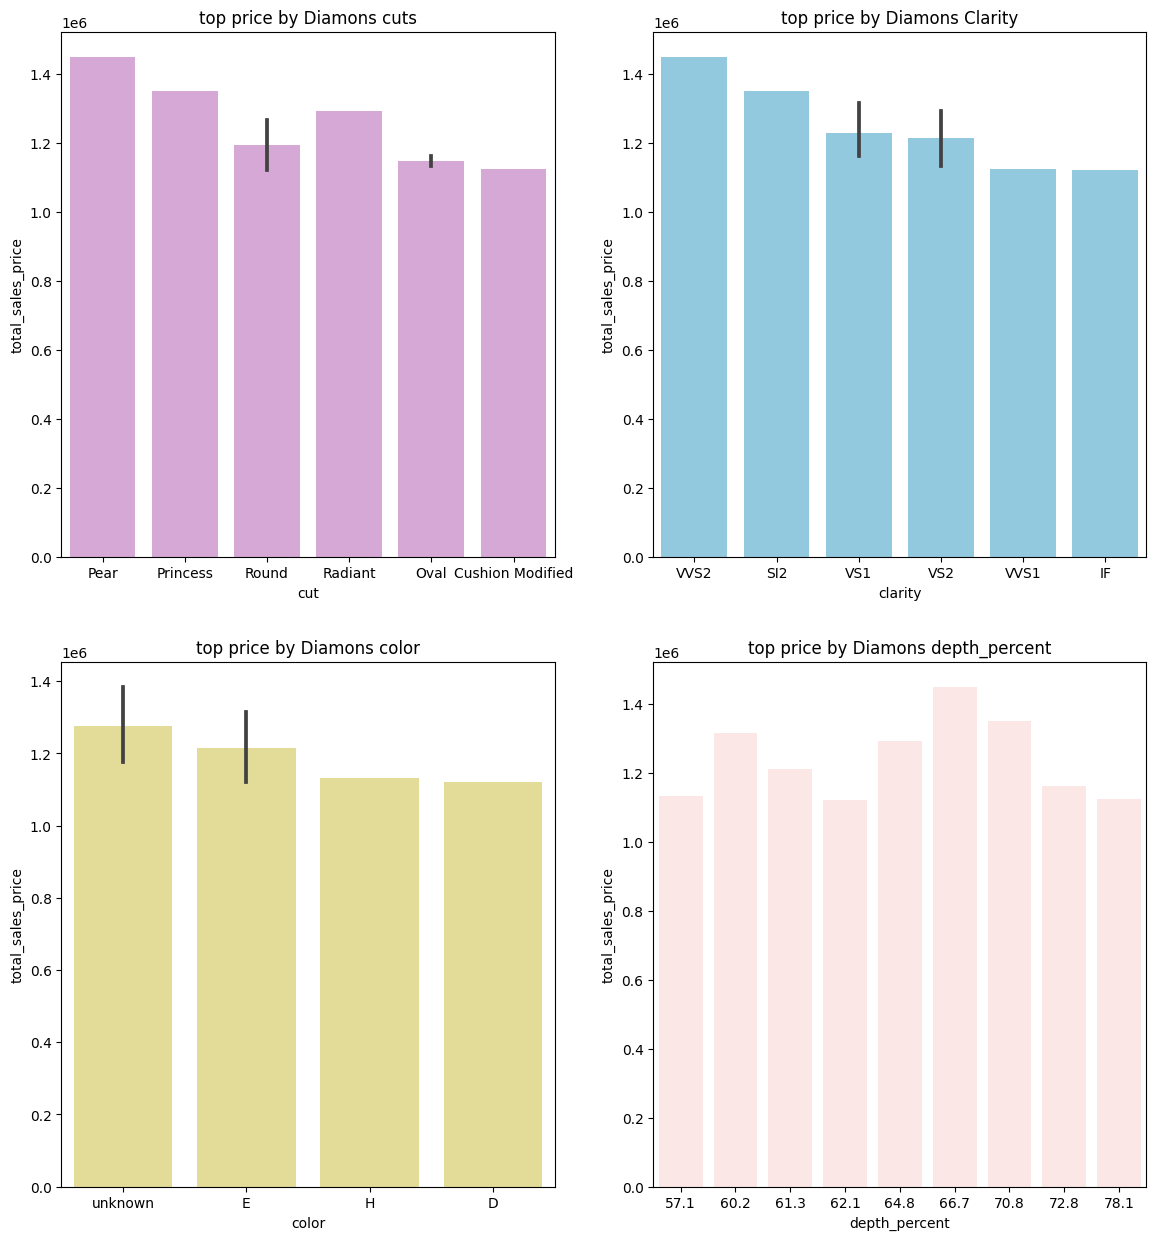

In [19]:
plt.figure(figsize=(14, 15))
plt.subplot(2, 2, 1)
sns.barplot(top_price_by_cut,x='cut',y='total_sales_price',color=pc[4],orient='v')
plt.title('top price by Diamons cuts')
plt.subplot(2,2,2)
sns.barplot(top_price_by_clarty,x='clarity',y='total_sales_price',color=pc[5],orient='v')
plt.title('top price by Diamons Clarity')
plt.subplot(2,2,3)
sns.barplot(top_price_by_color,x='color',y='total_sales_price',color=pc[6],orient='v')
plt.title('top price by Diamons color')
plt.subplot(2,2,4)
sns.barplot(top_price_by_depth_percent,x='depth_percent',y='total_sales_price',color=pc[7],orient='v')
plt.title('top price by Diamons depth_percent')
plt.show()

In this graph as we can see there is a vertical line above Round,Oval,VS1,VS2. Those line are because of overlaping As we can see in the top price by Diamons and Clarity Table

In [20]:
df.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

Listing Columns Who has Object DataType



In [21]:
categorical_columns = [feature for feature in df.columns if df[feature].dtypes =='O']
categorical_columns

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

Listing Columns Who has Numeric DataType and removing Total_Price from feature


In [22]:
numerical_columns=[feature for feature in df.columns if df[feature].dtypes !='O']
numerical_columns.pop(-1)
features=numerical_columns+categorical_columns
features

['carat_weight',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

Let's see graph between every Numeric feartures. And Those assumption can help in futer process.

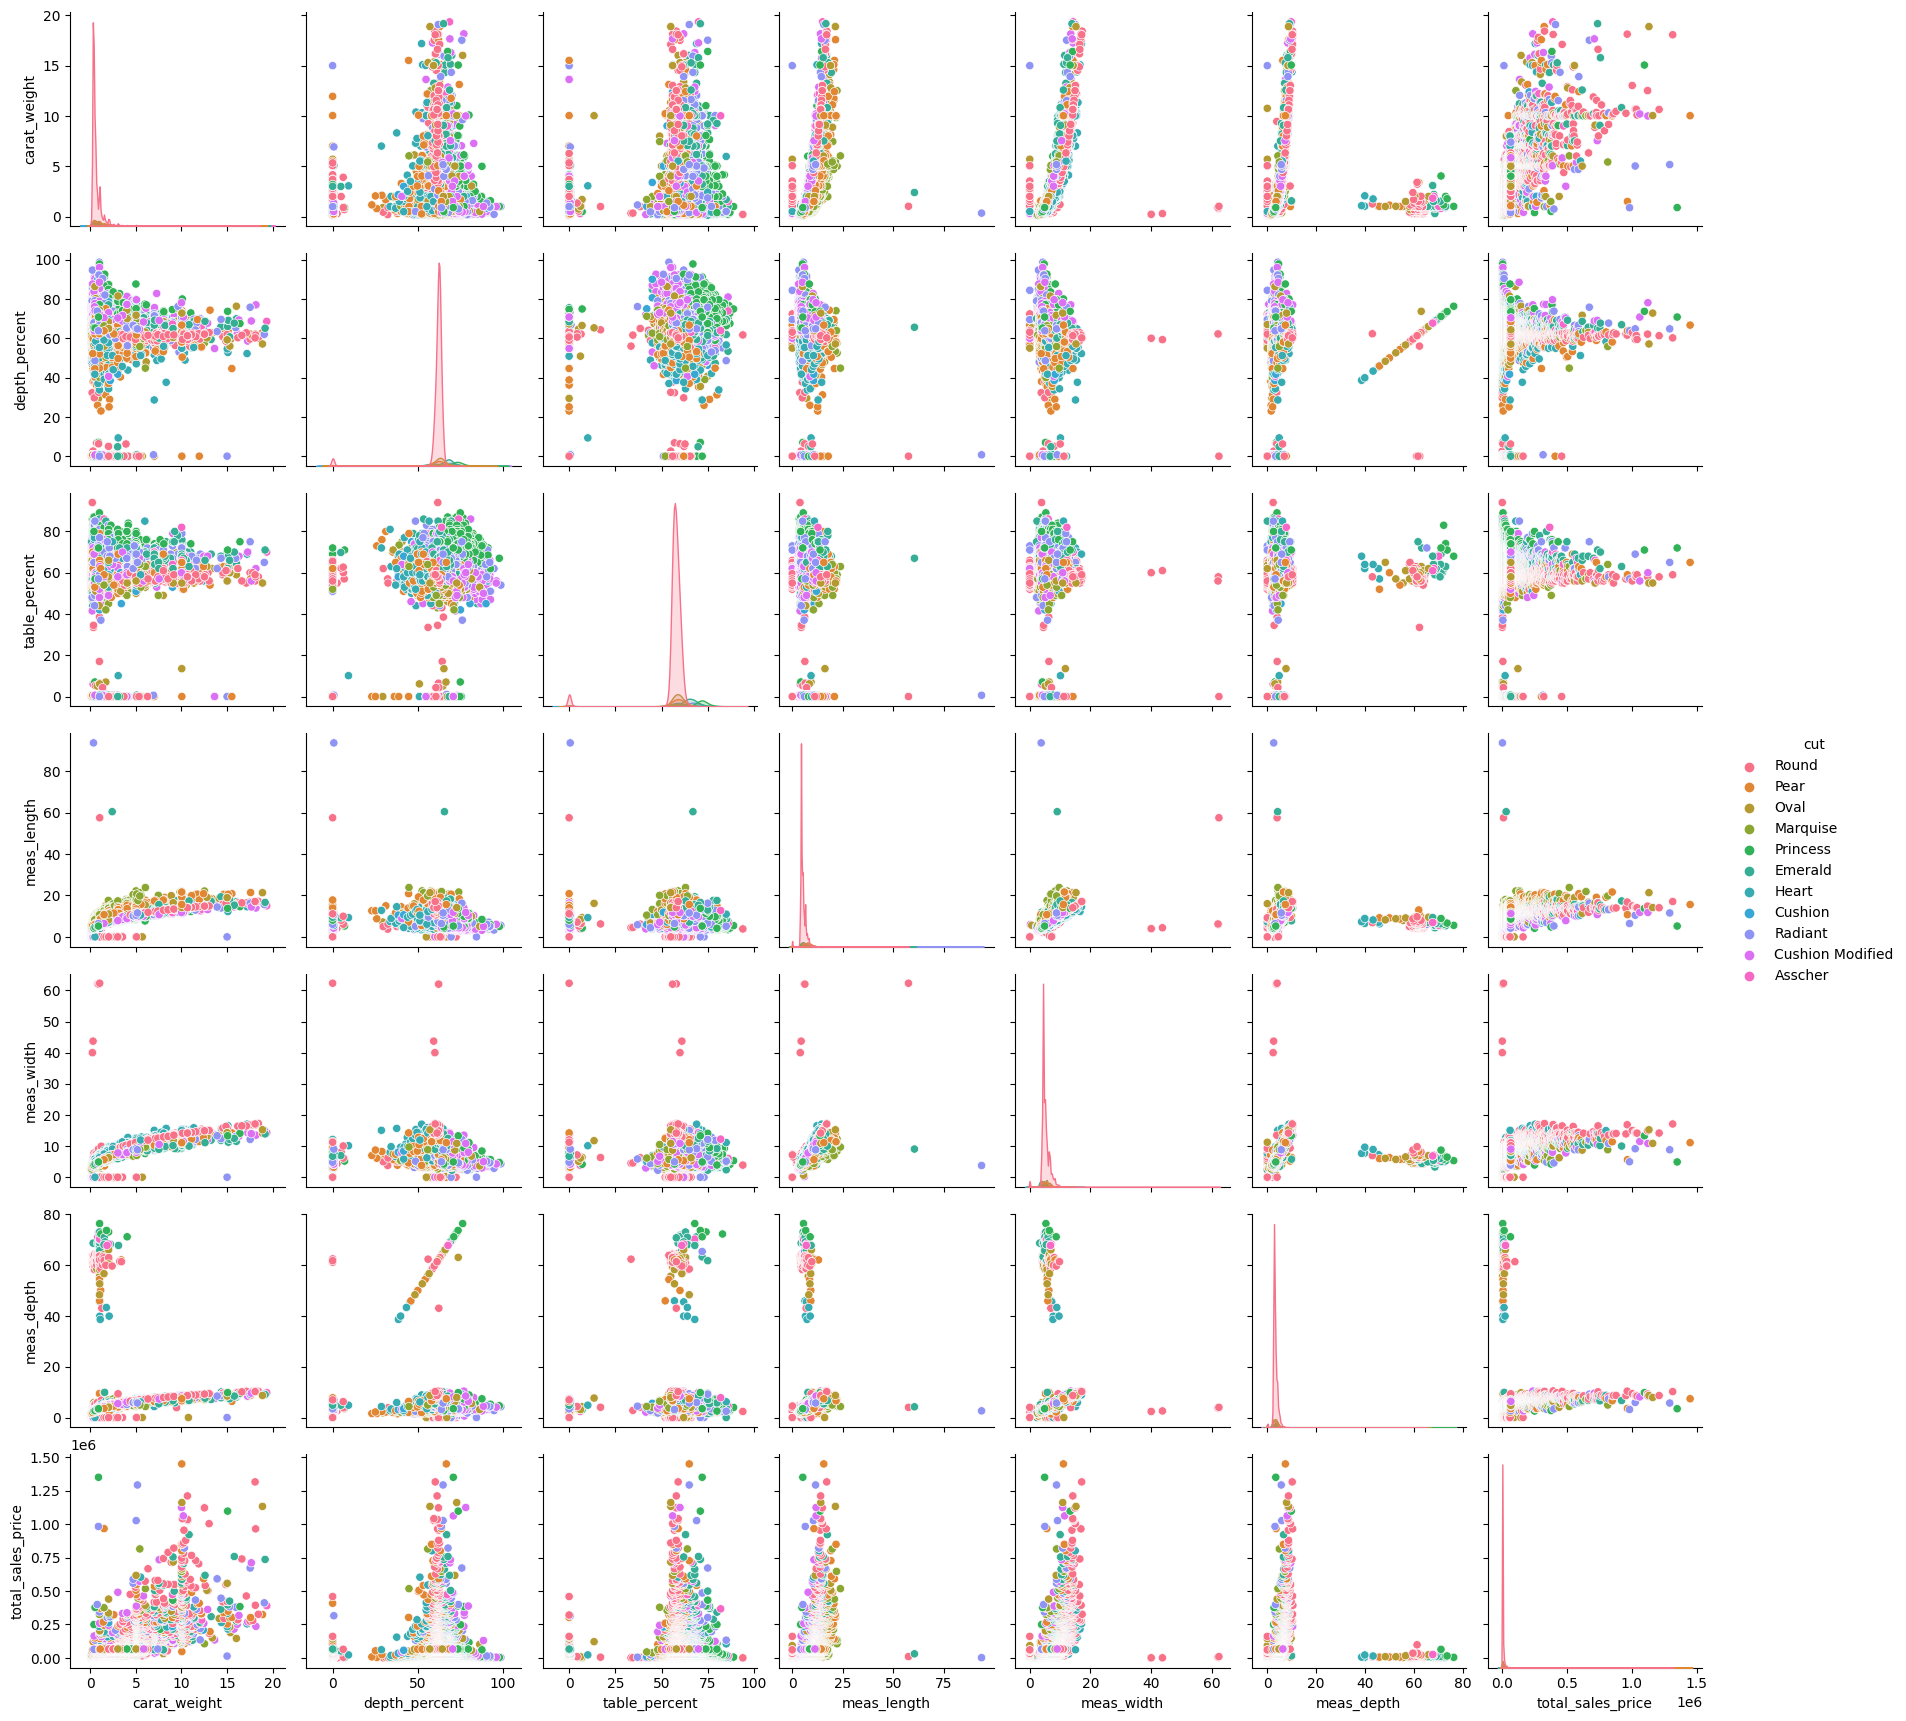

In [ ]:
sns.pairplot(df, hue= "cut" )

cut:


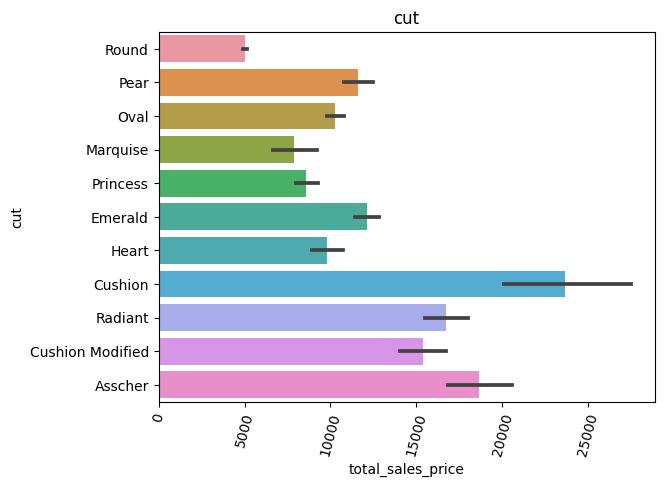

color:


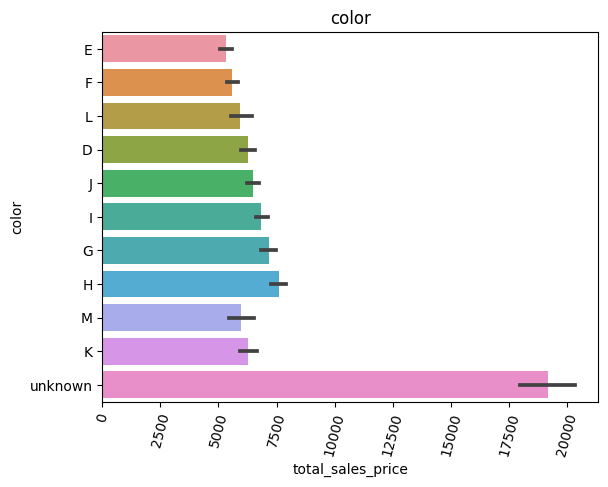

clarity:


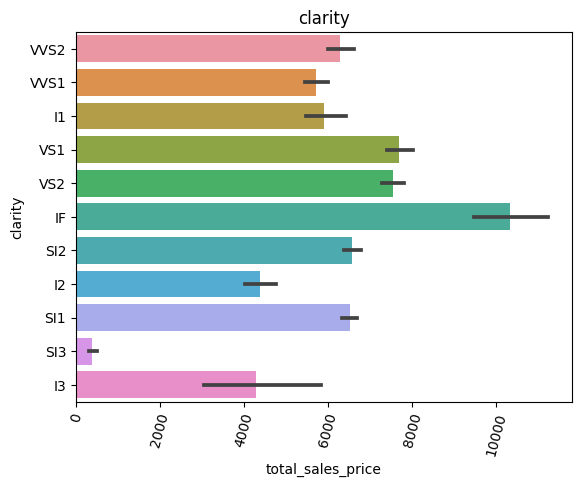

cut_quality:


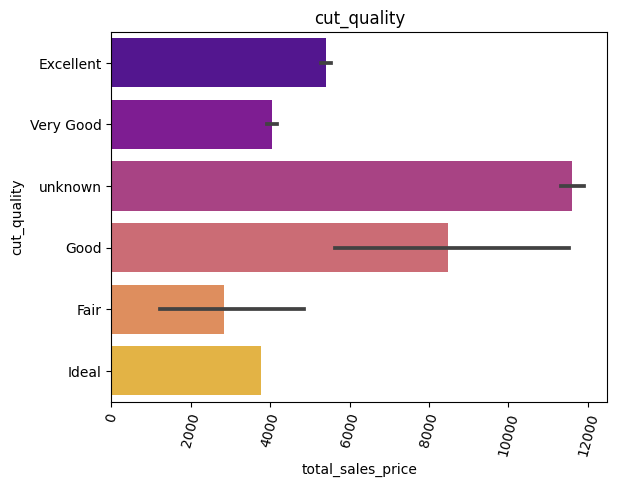

lab:


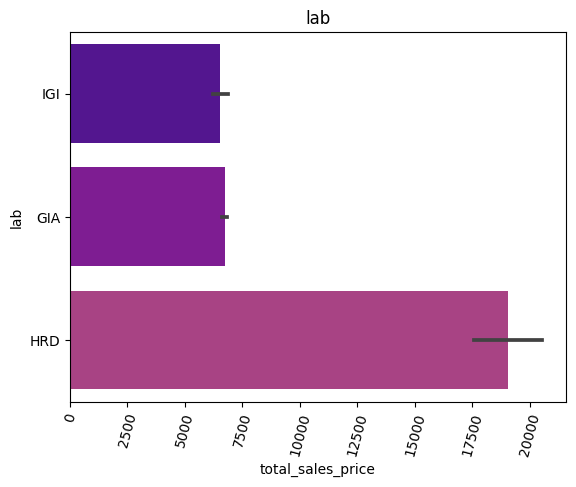

symmetry:


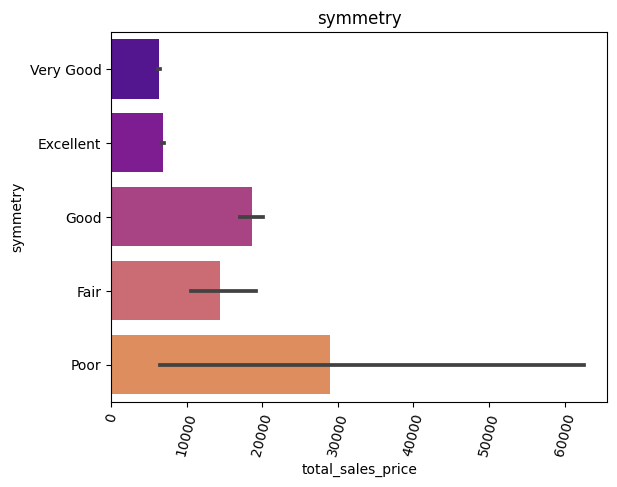

polish:


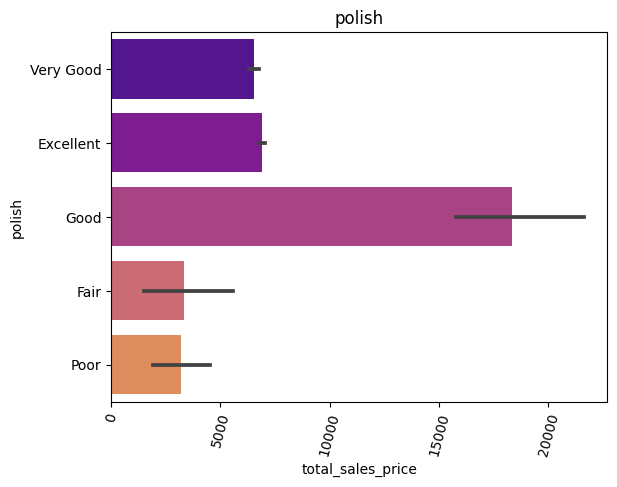

eye_clean:


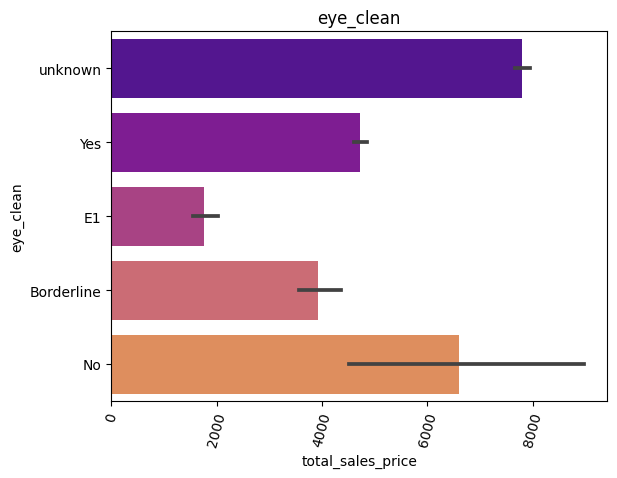

culet_size:


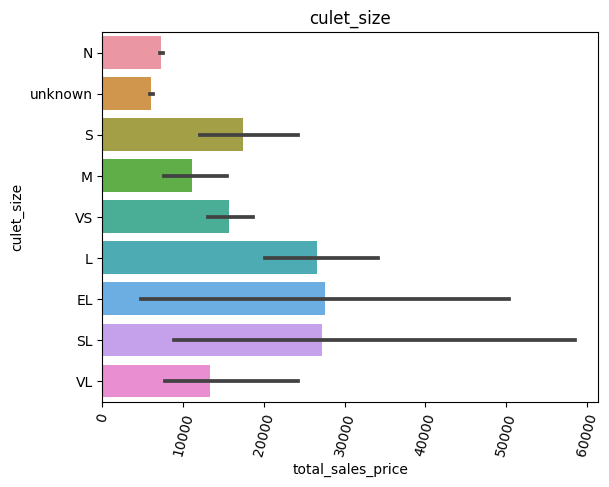

culet_condition:


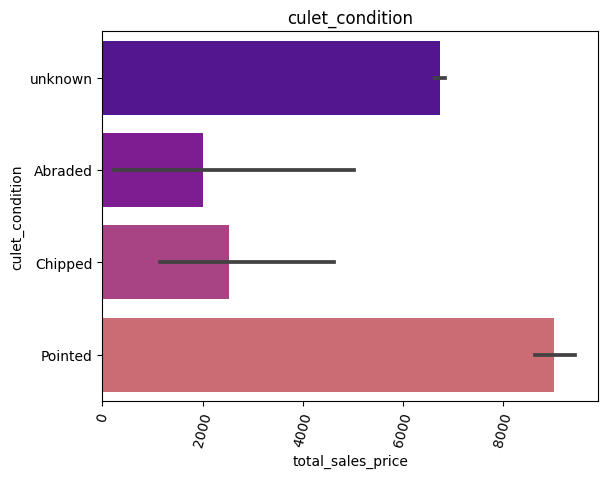

girdle_min:


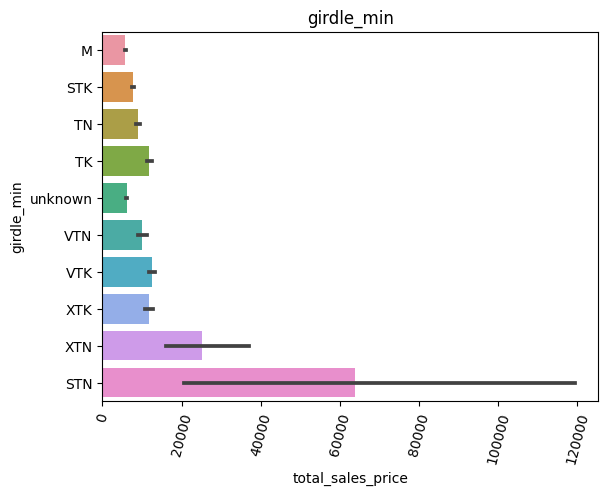

girdle_max:


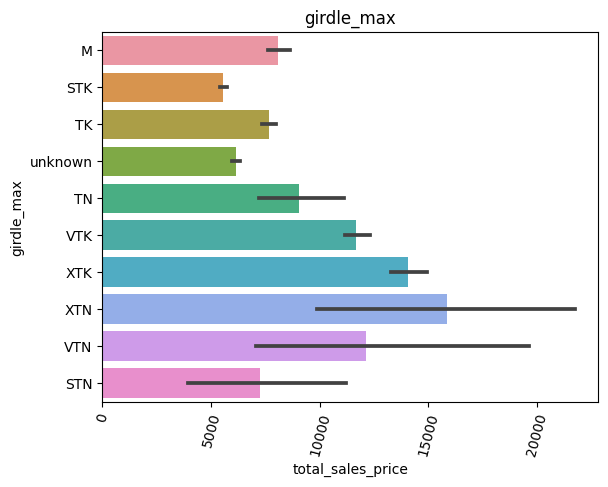

fluor_color:


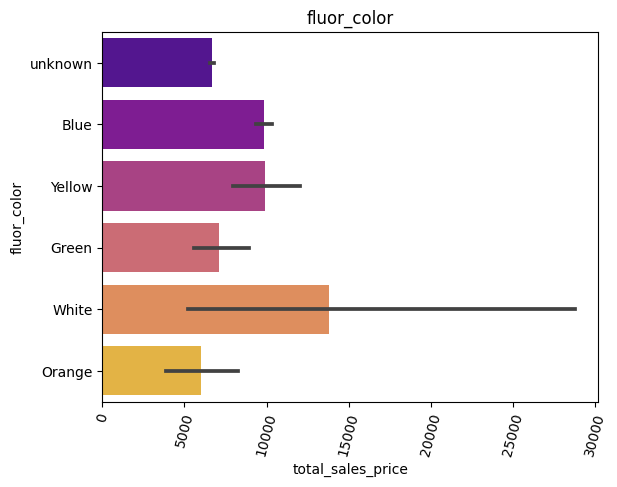

fluor_intensity:


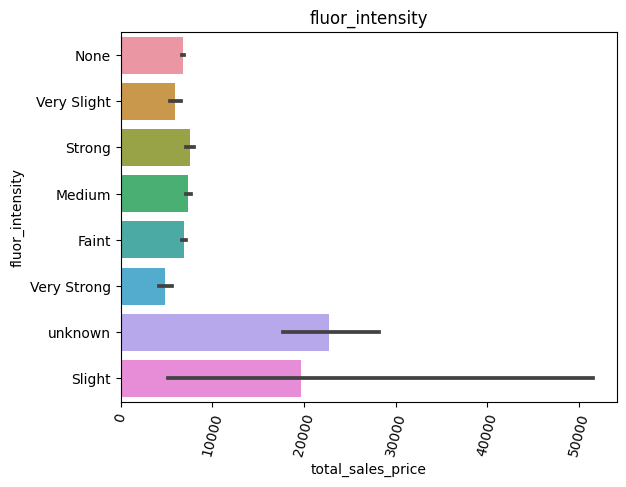

fancy_color_dominant_color:


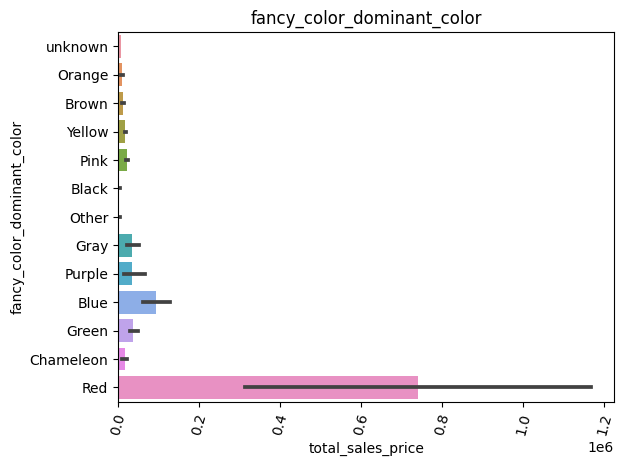

fancy_color_secondary_color:


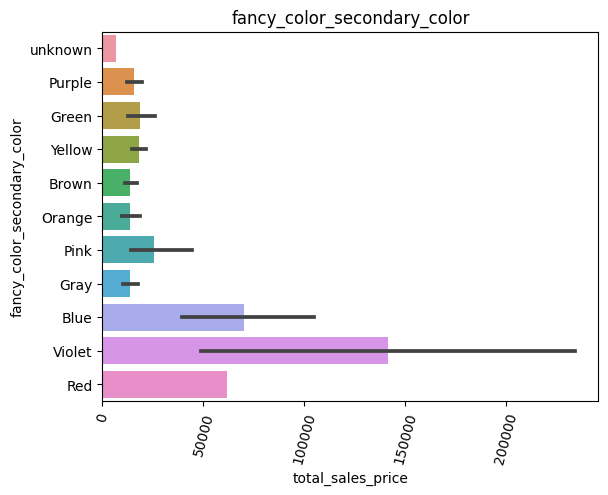

fancy_color_overtone:


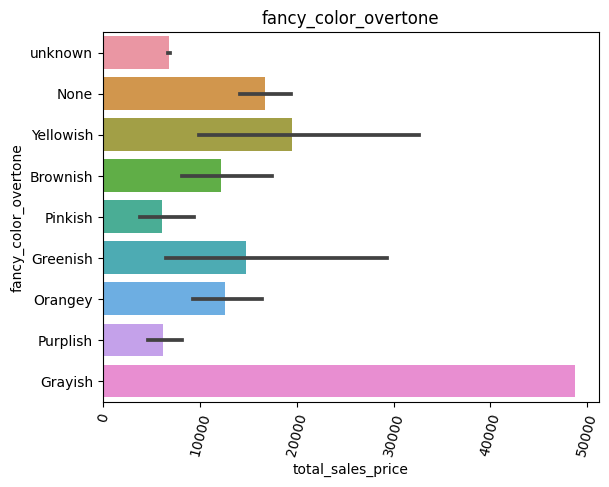

fancy_color_intensity:


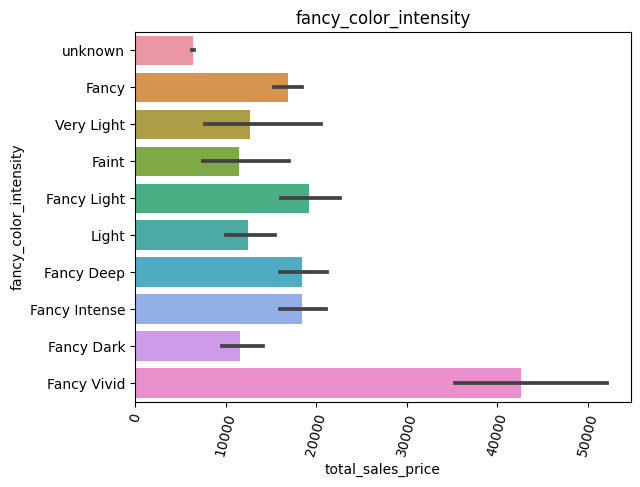

In [23]:
for cat in categorical_columns:
    sns.barplot(df,x='total_sales_price',y=cat)
    plt.xticks(rotation=75)
    plt.title(cat)
    print(cat +':')
    plt.show()

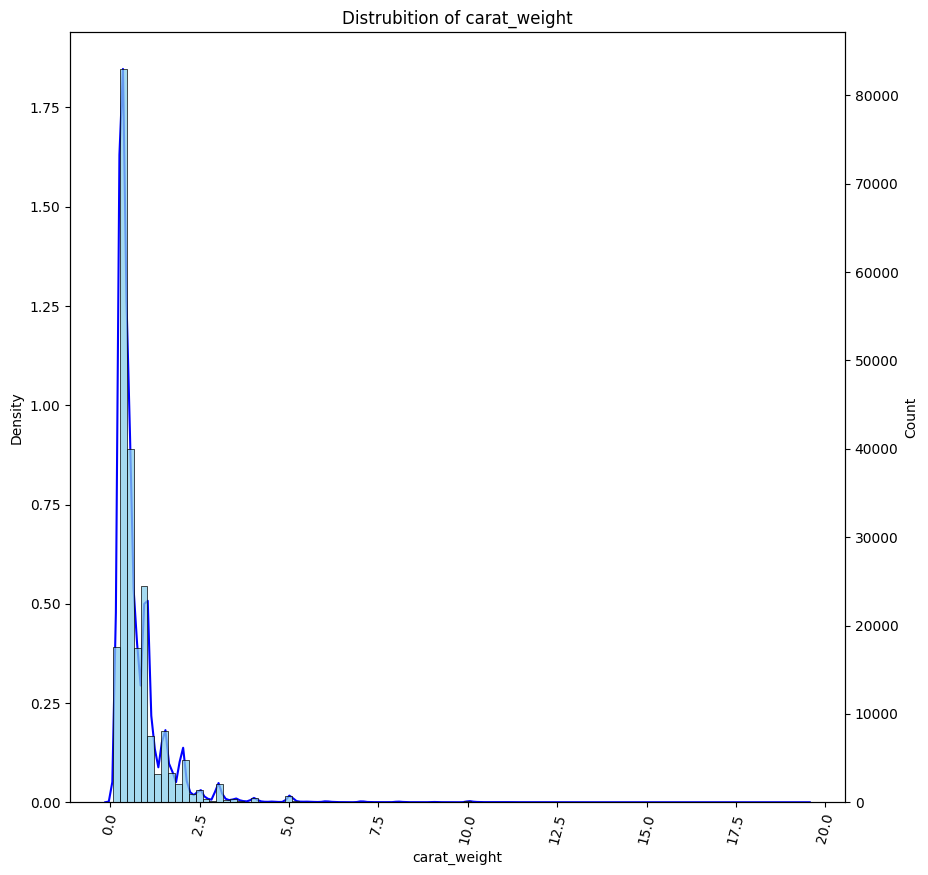

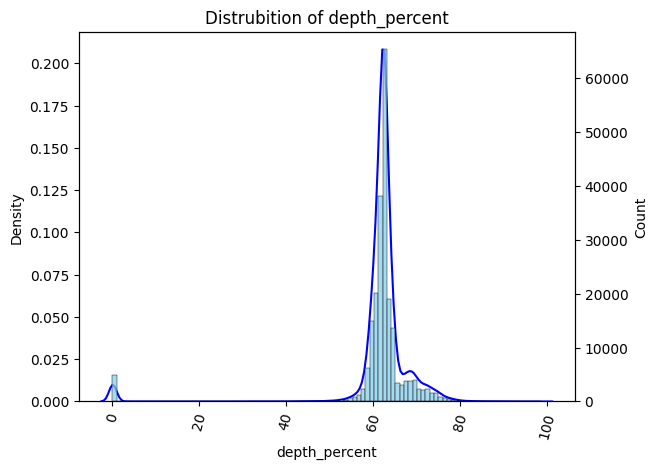

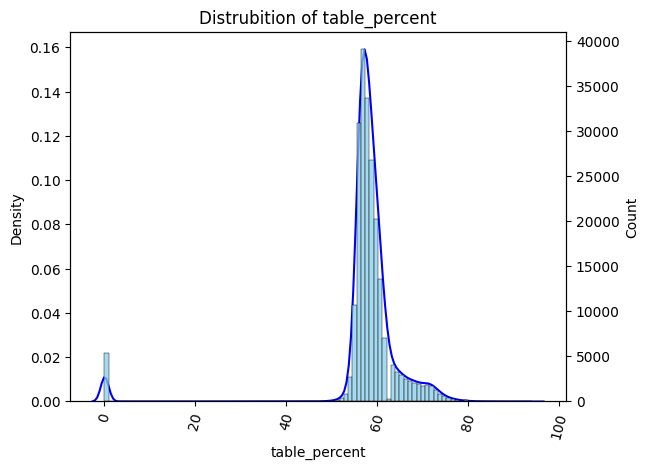

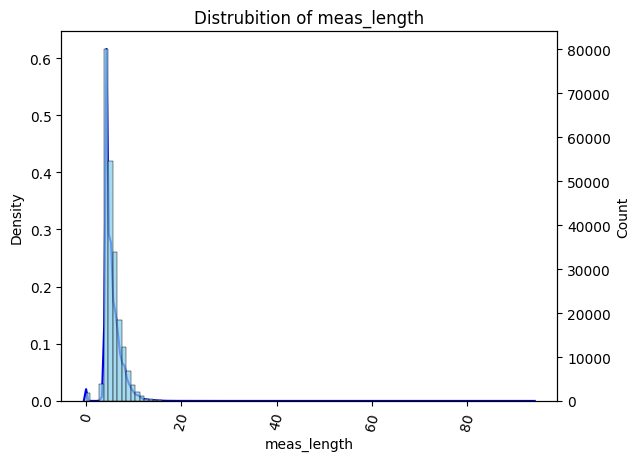

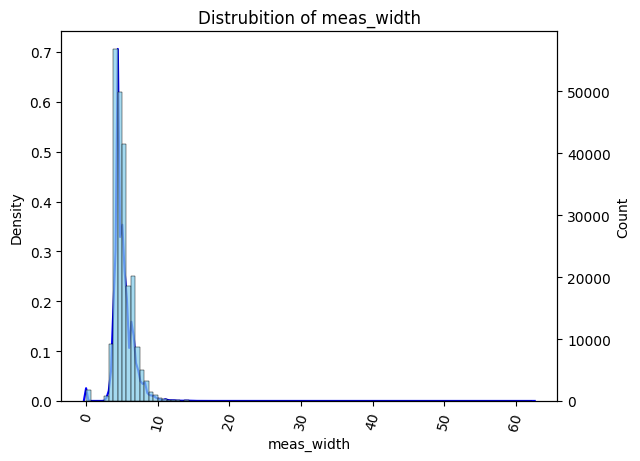

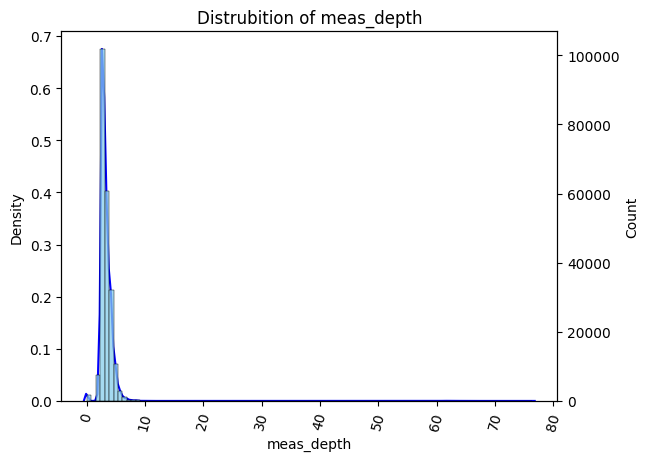

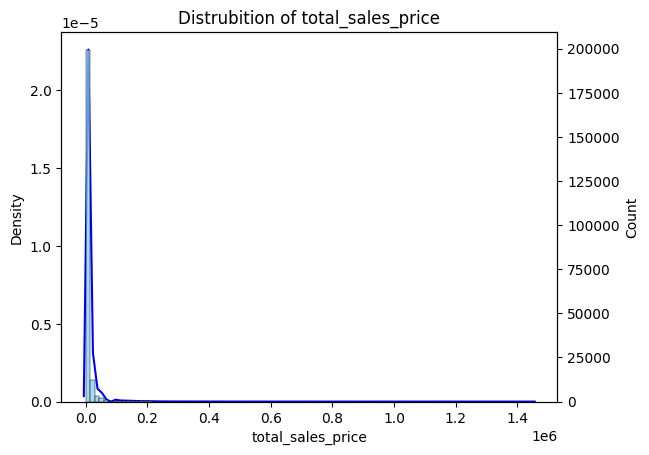

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
for cat in numerical_columns:
    sns.kdeplot(df,x=cat,color='blue')
    plt.xticks(rotation=75)
    plt.title('Distrubition of {}'.format(cat))
    plt.twinx()
    sns.histplot(data=df, x=cat, bins=100,color=pc[5])
    plt.show()
    print()
sns.kdeplot(df,x='total_sales_price',gridsize=100,color='blue')
plt.title('Distrubition of total_sales_price')
plt.twinx()
sns.histplot(data=df, x='total_sales_price', bins=100,color=pc[5])
plt.show()

In [25]:
lab_dist = df["lab"].value_counts()
lab_dist

GIA    200434
IGI     15865
HRD      3404
Name: lab, dtype: int64

In [26]:
color_dist = df["color"].value_counts()
color_dist

E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: color, dtype: int64

In [27]:
clarity_dist = df["clarity"].value_counts()
clarity_dist

SI1     38627
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: clarity, dtype: int64

In [28]:
cut_dist = df["cut"].value_counts()
cut_dist

Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: cut, dtype: int64

<Axes: ylabel='cut'>

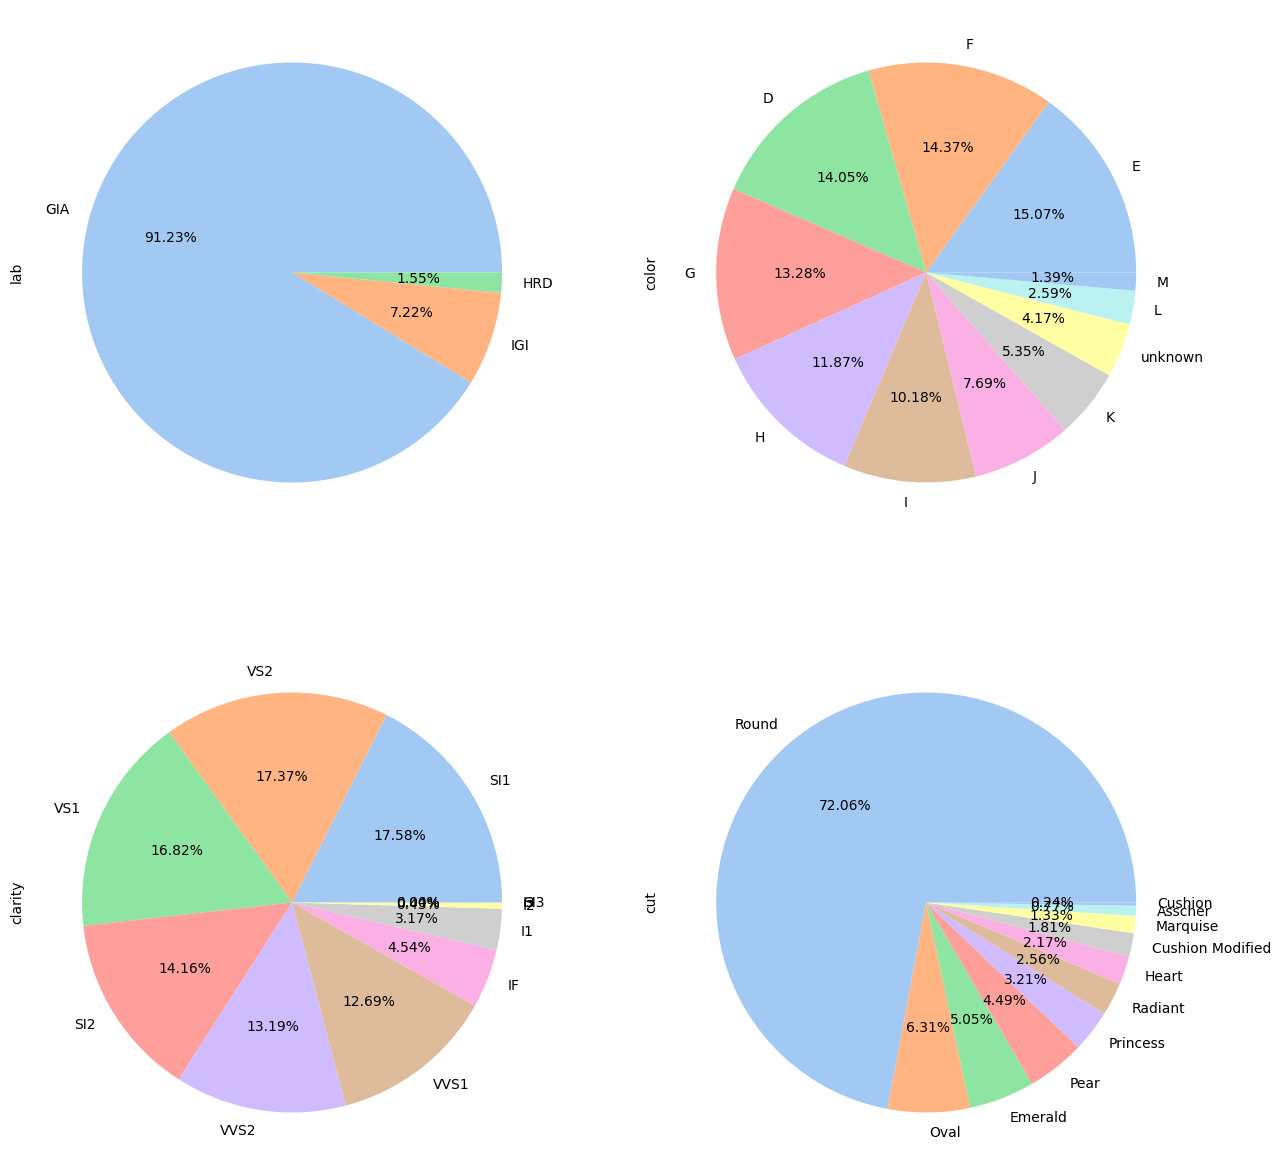

In [36]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
piec_colors = sns.color_palette('pastel')[0:len(lab_dist)]
lab_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.subplot(2, 2, 2)
piec_colors = sns.color_palette('pastel')[0:len(color_dist)]
color_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.subplot(2, 2, 3)
piec_colors = sns.color_palette('pastel')[0:len(clarity_dist)]
clarity_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.subplot(2, 2, 4)
piec_colors = sns.color_palette('pastel')[0:len(cut_dist)]
cut_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
